In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join,isdir
import IPython
from IPython.display import Audio
import librosa
from librosa.display import waveplot,specshow
import numpy as np
from collections import defaultdict


# Song Extraction from fma_small

1. Find the song folder path relative to the current computer
2. Retrieve the different genre classifications
3. Identify each song via its full path to song using index, to guarantee one-to-one mapping 
4. Sort in alphabetical order

In [2]:
#retrieving path to the fma_small directory and the corresponding meta data
HOME_DIR = IPython.utils.path.get_home_dir()

temp = join(HOME_DIR, 'Documents')
path_to_small_fma = join(temp, 'fma_small')
json_file = join(path_to_small_fma,'fma_small.json')
#locate meta_dta
print(path_to_small_fma)
df = pd.read_json(json_file)
print(json_file)


/Users/chibmac/Documents/fma_small
/Users/chibmac/Documents/fma_small/fma_small.json


In [3]:
#only choose genre as this is the label
df = df.loc[:,['top_genre']]

#locate each individual song by its full path
df['temp'] = path_to_small_fma
str_index = ["%.2d" % x for x in df.index]
df['full_path_to_song'] = df.temp.map(str)+ "/"+ df['top_genre'].values+ "/"+ str_index+ ".mp3"
del df['temp']
df.sort_values(by = 'top_genre', inplace = True)
df.head()

top_genre                                  full_path_to_song
100538  Electronic  /Users/chibmac/Documents/fma_small/Electronic/...
43206   Electronic  /Users/chibmac/Documents/fma_small/Electronic/...
43199   Electronic  /Users/chibmac/Documents/fma_small/Electronic/...
43153   Electronic  /Users/chibmac/Documents/fma_small/Electronic/...
43124   Electronic  /Users/chibmac/Documents/fma_small/Electronic/...

''' genre and number of elements in genre'''
genre_count = []
for genre in genre_list:
    genre_count.append(df['top_genre'].value_counts()[genre])
    
genre_count
zipped = zip(genre_sorted_list,genre_count)
for genre,num_of_songs in zipped:
    print(genre,num_of_songs)
    for i in range(num_of_songs):
        song =  join(full_path_to_genre, file[df.index[i]])
        

In [4]:
song_num = 0
sampling_rate = 44100
song = df['full_path_to_song'].values

y, sr = librosa.load(song[song_num], sampling_rate)
print(song[song_num])
# Play it back!
Audio(data=y, rate=sampling_rate)

/Users/chibmac/Documents/fma_small/Electronic/100538.mp3


# Basic Work Flow

## Segmentation - > Feature Extraction -> Classification


1. Segmentation:
2. Feature Extraction:
3. Machine learning:

https://ccrma.stanford.edu/wiki/MIR_workshop_2014

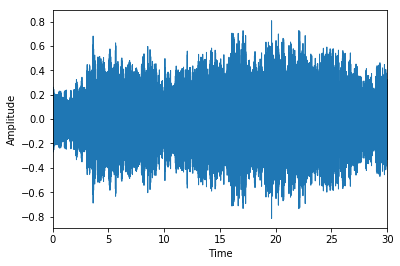

In [6]:
waveplot(y,sr)
plt.ylabel('Amplitude')

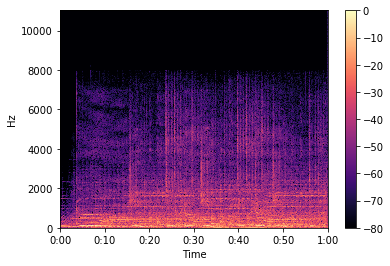

In [7]:
stft = librosa.stft(y)
log_power = librosa.logamplitude(stft**2, ref_power=np.max)

specshow(log_power, x_axis='time', y_axis='linear')
plt.colorbar()

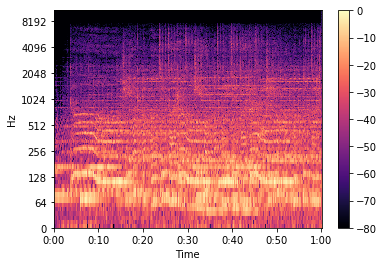

In [8]:
'''plot log as we want to emphasis changes that are occuring at 
low frequencies'''
specshow(log_power, x_axis='time', y_axis='log')
plt.colorbar()

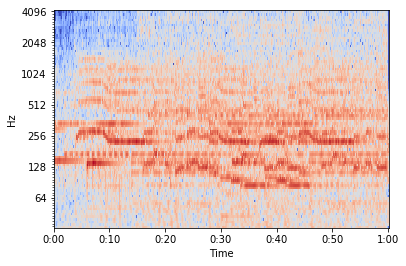

In [9]:
#constant q transform is for a direct log-frequency analysis
#in addition, one vertical move represents one semi-tone, so things are
#shit invariant vertically aswell as horizontally
cqt = librosa.cqt(y,sr)

specshow(librosa.logamplitude(cqt**2), x_axis = 'time', y_axis = 'cqt_hz')

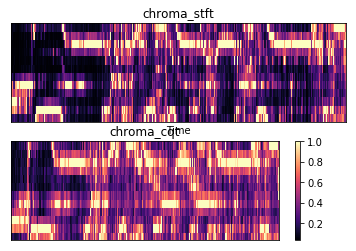

In [10]:
'''Spectral features are often used to analyse harmony or timbre
Usually the product of a spectogram and a filter bank

Pitch vs Pitch class
Chroma measures the amout of energy in each pitch class,
frame1, frame2,frame3 and collaspe down (many-to-one mapping) expectation 
of pitch class'''

chroma_stft = librosa.feature.chroma_stft(y = y, sr= sr, n_chroma = 12,
                                          n_fft=4096)
chroma_cqt = librosa.feature.chroma_cqt(y = y,sr = sr)

plt.figure()
plt.subplot(2,1,1)
specshow(chroma_stft)
plt.xlabel('Time')
plt.title('chroma_stft')
plt.subplot(2,1,2)
specshow(chroma_cqt)
plt.title('chroma_cqt')
plt.colorbar()

In [11]:
#Other Spectral Features: Mel spectra, MFCC, Tonnetz
#spectral contrast, bandwidth e.t.c

mel_spec = librosa.feature.melspectrogram(y=y,sr =sr)
MFCC = librosa.feature.mfcc(y = y,sr = sr)
tonnetz = librosa.feature.tonnetz(y =y, sr = sr)


In [12]:
#harmonic representation usually means throwing away transients are a 
#random drum sound won't be that relevant
y_harmonics, y_percussive = librosa.effects.hpss(y)

In [13]:
Audio(data=y, rate=sr)